In [1]:
# Useful stuff
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots as mpl
import pyemma.coordinates as coor

In [2]:
directo='/home/janet/Desktop/HSVTK/APO/'
trajfiles_APO=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_APO='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_APO.pdb'

directo='/home/janet/Desktop/HSVTK/APO_MG/'
trajfiles_APOMG=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_APOMG='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_APO_MG.pdb'

directo='/home/janet/Desktop/HSVTK/THM/'
trajfiles_THM=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_THM.pdb'

directo='/home/janet/Desktop/HSVTK/GCV/'
trajfiles_GCV=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV.pdb'

directo='/home/janet/Desktop/HSVTK/THM_ATP/'
trajfiles_THM_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_THM_ATP.pdb'

directo='/home/janet/Desktop/HSVTK/GCV_ATP/'
trajfiles_GCV_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV_ATP.pdb'

In [3]:
trajfiles = []
trajfiles.append(trajfiles_APO)
trajfiles.append(trajfiles_APOMG)
trajfiles.append(trajfiles_THM)
trajfiles.append(trajfiles_GCV)
trajfiles.append(trajfiles_THM_ATP)
trajfiles.append(trajfiles_GCV_ATP)
#trajfiles.append(trajfiles_THM_ADP)
#trajfiles.append(trajfiles_GCV_ADP)
topfiles = []
topfiles.append(topfile_APO)
topfiles.append(topfile_APOMG)
topfiles.append(topfile_THM)
topfiles.append(topfile_GCV)
topfiles.append(topfile_THM_ATP)
topfiles.append(topfile_GCV_ATP)
#topfiles.append(topfile_THM_ADP)
#topfiles.append(topfile_GCV_ADP)

In [4]:
# Load pytraj trajectories

SYS1 = pt.iterload(trajfiles[0], top=topfiles[0])
SYS2 = pt.iterload(trajfiles[1], top=topfiles[1])
SYS3 = pt.iterload(trajfiles[2], top=topfiles[2])
SYS4 = pt.iterload(trajfiles[3], top=topfiles[3])
SYS5 = pt.iterload(trajfiles[4], top=topfiles[4])
SYS6 = pt.iterload(trajfiles[5], top=topfiles[5])
#SYS7 = pt.iterload(trajfiles[6], top=topfiles[6])
#SYS8 = pt.iterload(trajfiles[7], top=topfiles[7])
# Compute RMSF
SYS1_rmsf = pt.atomicfluct(SYS1,'@CA')
SYS2_rmsf = pt.atomicfluct(SYS2,'@CA')
SYS3_rmsf = pt.atomicfluct(SYS3,'@CA')
SYS4_rmsf = pt.atomicfluct(SYS4,'@CA')
SYS5_rmsf = pt.atomicfluct(SYS5,'@CA')
SYS6_rmsf = pt.atomicfluct(SYS6,'@CA')
#SYS7_rmsf = pt.atomicfluct(SYS7,'@CA')
#SYS8_rmsf = pt.atomicfluct(SYS8,'@CA')

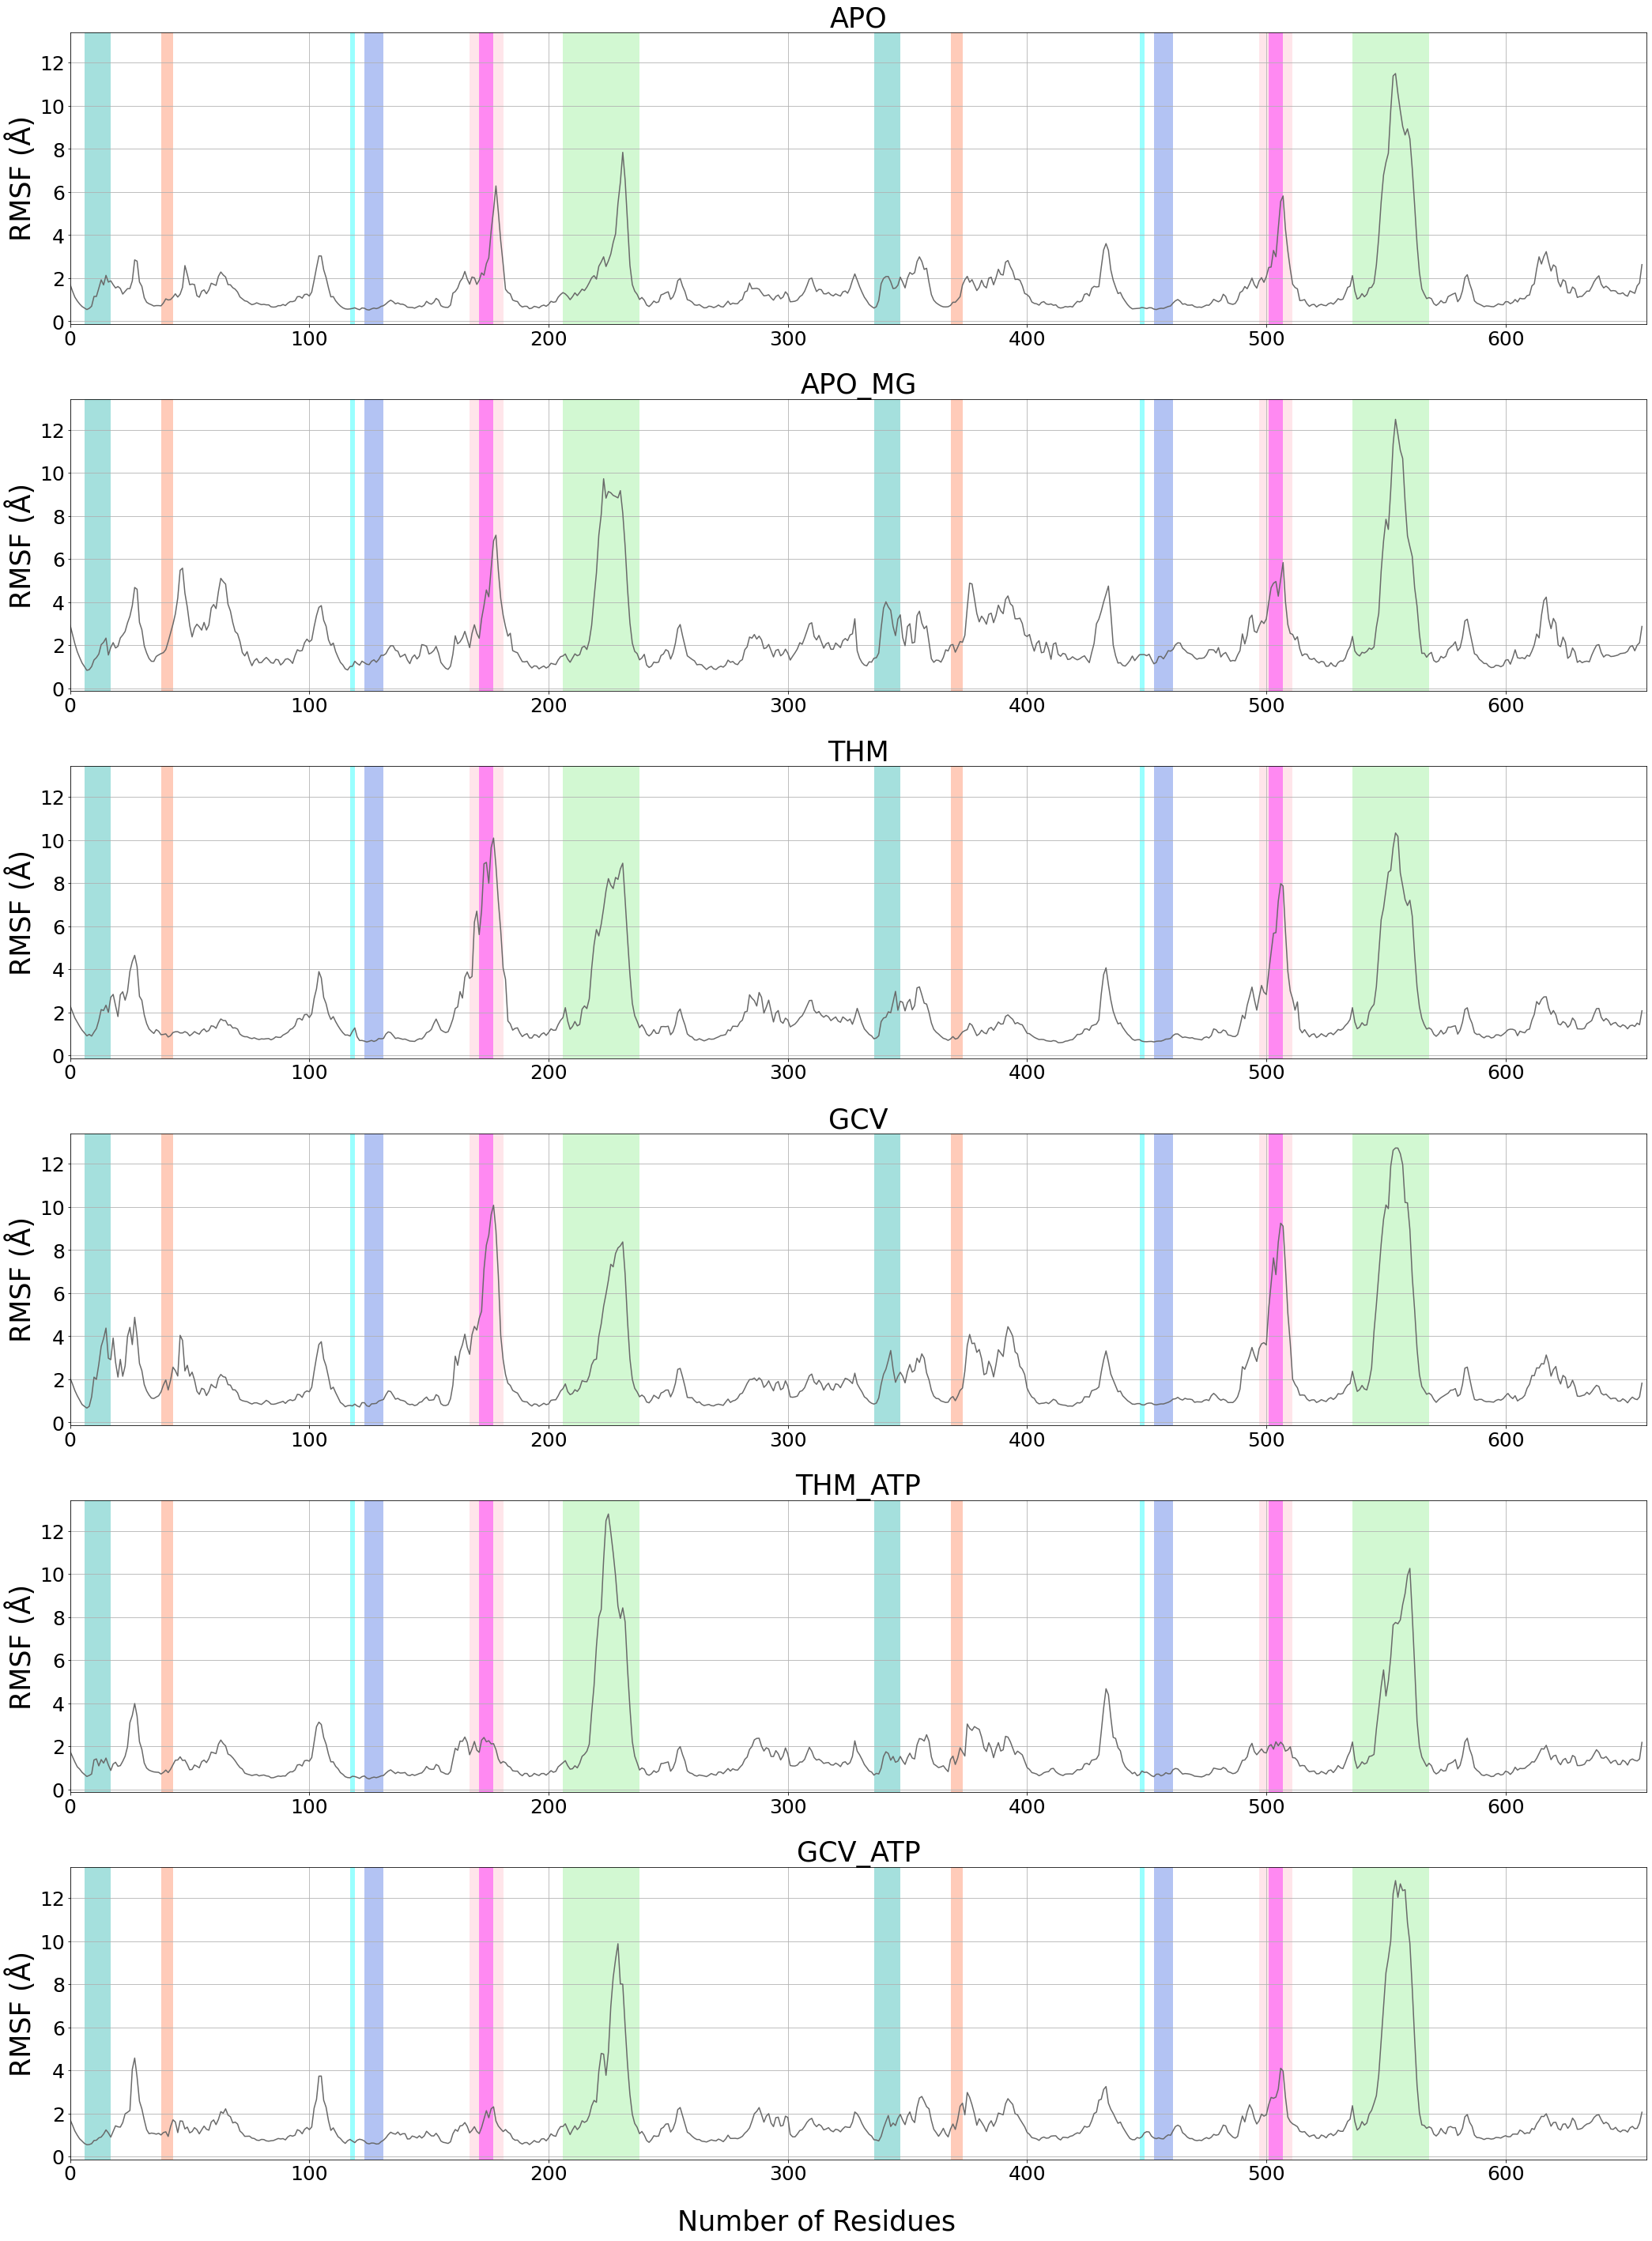

In [10]:
# Plot

fig, [ax1,ax2,ax3,ax4,ax5,ax6] = plt.subplots(6,figsize=(30,40), sharey=True)

ax1.plot(SYS1_rmsf[:,1], color='dimgrey')
ax2.plot(SYS2_rmsf[:,1], color='dimgrey')
ax3.plot(SYS3_rmsf[:,1], color='dimgrey')
ax4.plot(SYS4_rmsf[:,1], color='dimgrey')
ax5.plot(SYS5_rmsf[:,1], color='dimgrey')
ax6.plot(SYS6_rmsf[:,1], color='dimgrey')

ax1.set_xlim(0,659)
ax2.set_xlim(0,659)
ax3.set_xlim(0,659)
ax4.set_xlim(0,659)
ax5.set_xlim(0,659)
ax6.set_xlim(0,659)
ax7.set_xlim(0,659)

ax1.axvspan(6, 17, facecolor='lightseagreen', alpha=0.4)
ax1.axvspan(38,43, facecolor='coral', alpha=0.4)
ax1.axvspan(117,119, facecolor='cyan', alpha=0.4)
ax1.axvspan(123,131, facecolor='royalblue', alpha=0.4)
ax1.axvspan(167,181, facecolor='pink', alpha=0.4)
ax1.axvspan(206,238, facecolor='lightgreen', alpha=0.4)
ax1.axvspan(171,177, facecolor='magenta', alpha=0.4)

ax1.axvspan(336,347, facecolor='lightseagreen', alpha=0.4)
ax1.axvspan(368,373, facecolor='coral', alpha=0.4)
ax1.axvspan(447,449, facecolor='cyan', alpha=0.4)
ax1.axvspan(453,461, facecolor='royalblue', alpha=0.4)
ax1.axvspan(497,511, facecolor='pink', alpha=0.4)
ax1.axvspan(536,568, facecolor='lightgreen', alpha=0.4)
ax1.axvspan(501,507, facecolor='magenta', alpha=0.4)

ax2.axvspan(6, 17, facecolor='lightseagreen', alpha=0.4)
ax2.axvspan(38,43, facecolor='coral', alpha=0.4)
ax2.axvspan(117,119, facecolor='cyan', alpha=0.4)
ax2.axvspan(123,131, facecolor='royalblue', alpha=0.4)
ax2.axvspan(167,181, facecolor='pink', alpha=0.4)
ax2.axvspan(206,238, facecolor='lightgreen', alpha=0.4)
ax2.axvspan(171,177, facecolor='magenta', alpha=0.4)

ax2.axvspan(336,347, facecolor='lightseagreen', alpha=0.4)
ax2.axvspan(368,373, facecolor='coral', alpha=0.4)
ax2.axvspan(447,449, facecolor='cyan', alpha=0.4)
ax2.axvspan(453,461, facecolor='royalblue', alpha=0.4)
ax2.axvspan(497,511, facecolor='pink', alpha=0.4)
ax2.axvspan(536,568, facecolor='lightgreen', alpha=0.4)
ax2.axvspan(501,507, facecolor='magenta', alpha=0.4)

ax3.axvspan(6, 17, facecolor='lightseagreen', alpha=0.4)
ax3.axvspan(38,43, facecolor='coral', alpha=0.4)
ax3.axvspan(117,119, facecolor='cyan', alpha=0.4)
ax3.axvspan(123,131, facecolor='royalblue', alpha=0.4)
ax3.axvspan(167,181, facecolor='pink', alpha=0.4)
ax3.axvspan(206,238, facecolor='lightgreen', alpha=0.4)
ax3.axvspan(171,177, facecolor='magenta', alpha=0.4)

ax3.axvspan(336,347, facecolor='lightseagreen', alpha=0.4)
ax3.axvspan(368,373, facecolor='coral', alpha=0.4)
ax3.axvspan(447,449, facecolor='cyan', alpha=0.4)
ax3.axvspan(453,461, facecolor='royalblue', alpha=0.4)
ax3.axvspan(497,511, facecolor='pink', alpha=0.4)
ax3.axvspan(536,568, facecolor='lightgreen', alpha=0.4)
ax3.axvspan(501,507, facecolor='magenta', alpha=0.4)

ax4.axvspan(6, 17, facecolor='lightseagreen', alpha=0.4)
ax4.axvspan(38,43, facecolor='coral', alpha=0.4)
ax4.axvspan(117,119, facecolor='cyan', alpha=0.4)
ax4.axvspan(123,131, facecolor='royalblue', alpha=0.4)
ax4.axvspan(167,181, facecolor='pink', alpha=0.4)
ax4.axvspan(206,238, facecolor='lightgreen', alpha=0.4)
ax4.axvspan(171,177, facecolor='magenta', alpha=0.4)

ax4.axvspan(336,347, facecolor='lightseagreen', alpha=0.4)
ax4.axvspan(368,373, facecolor='coral', alpha=0.4)
ax4.axvspan(447,449, facecolor='cyan', alpha=0.4)
ax4.axvspan(453,461, facecolor='royalblue', alpha=0.4)
ax4.axvspan(497,511, facecolor='pink', alpha=0.4)
ax4.axvspan(536,568, facecolor='lightgreen', alpha=0.4)
ax4.axvspan(501,507, facecolor='magenta', alpha=0.4)

ax5.axvspan(6, 17, facecolor='lightseagreen', alpha=0.4)
ax5.axvspan(38,43, facecolor='coral', alpha=0.4)
ax5.axvspan(117,119, facecolor='cyan', alpha=0.4)
ax5.axvspan(123,131, facecolor='royalblue', alpha=0.4)
ax5.axvspan(167,181, facecolor='pink', alpha=0.4)
ax5.axvspan(206,238, facecolor='lightgreen', alpha=0.4)
ax5.axvspan(171,177, facecolor='magenta', alpha=0.4)

ax5.axvspan(336,347, facecolor='lightseagreen', alpha=0.4)
ax5.axvspan(368,373, facecolor='coral', alpha=0.4)
ax5.axvspan(447,449, facecolor='cyan', alpha=0.4)
ax5.axvspan(453,461, facecolor='royalblue', alpha=0.4)
ax5.axvspan(497,511, facecolor='pink', alpha=0.4)
ax5.axvspan(536,568, facecolor='lightgreen', alpha=0.4)
ax5.axvspan(501,507, facecolor='magenta', alpha=0.4)

ax6.axvspan(6, 17, facecolor='lightseagreen', alpha=0.4)
ax6.axvspan(38,43, facecolor='coral', alpha=0.4)
ax6.axvspan(117,119, facecolor='cyan', alpha=0.4)
ax6.axvspan(123,131, facecolor='royalblue', alpha=0.4)
ax6.axvspan(167,181, facecolor='pink', alpha=0.4)
ax6.axvspan(206,238, facecolor='lightgreen', alpha=0.4)
ax6.axvspan(171,177, facecolor='magenta', alpha=0.4)

ax6.axvspan(336,347, facecolor='lightseagreen', alpha=0.4)
ax6.axvspan(368,373, facecolor='coral', alpha=0.4)
ax6.axvspan(447,449, facecolor='cyan', alpha=0.4)
ax6.axvspan(453,461, facecolor='royalblue', alpha=0.4)
ax6.axvspan(497,511, facecolor='pink', alpha=0.4)
ax6.axvspan(536,568, facecolor='lightgreen', alpha=0.4)
ax6.axvspan(501,507, facecolor='magenta', alpha=0.4)

ax1.set_title('APO', fontsize=35)
ax2.set_title('APO_MG', fontsize=35)
ax3.set_title('THM', fontsize=35)
ax4.set_title('GCV', fontsize=35)
ax5.set_title('THM_ATP', fontsize=35)
ax6.set_title('GCV_ATP', fontsize=35)


ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax3.tick_params(axis='both', which='major', labelsize=25)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax5.tick_params(axis='both', which='major', labelsize=25)
ax6.tick_params(axis='both', which='major', labelsize=25)



ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()                
 
ax1.set_ylabel('RMSF (Å)', fontsize=35)    
ax2.set_ylabel('RMSF (Å)', fontsize=35)    
ax3.set_ylabel('RMSF (Å)', fontsize=35)    
ax4.set_ylabel('RMSF (Å)', fontsize=35)    
ax5.set_ylabel('RMSF (Å)', fontsize=35)    
ax6.set_ylabel('RMSF (Å)', fontsize=35)    
ax7.set_ylabel('RMSF (Å)', fontsize=35)    


fig.supxlabel('Number of Residues', fontsize=35)


fig.tight_layout(pad=3.0, w_pad=3.0, h_pad=3.0)

# RMSF FLAP SITE

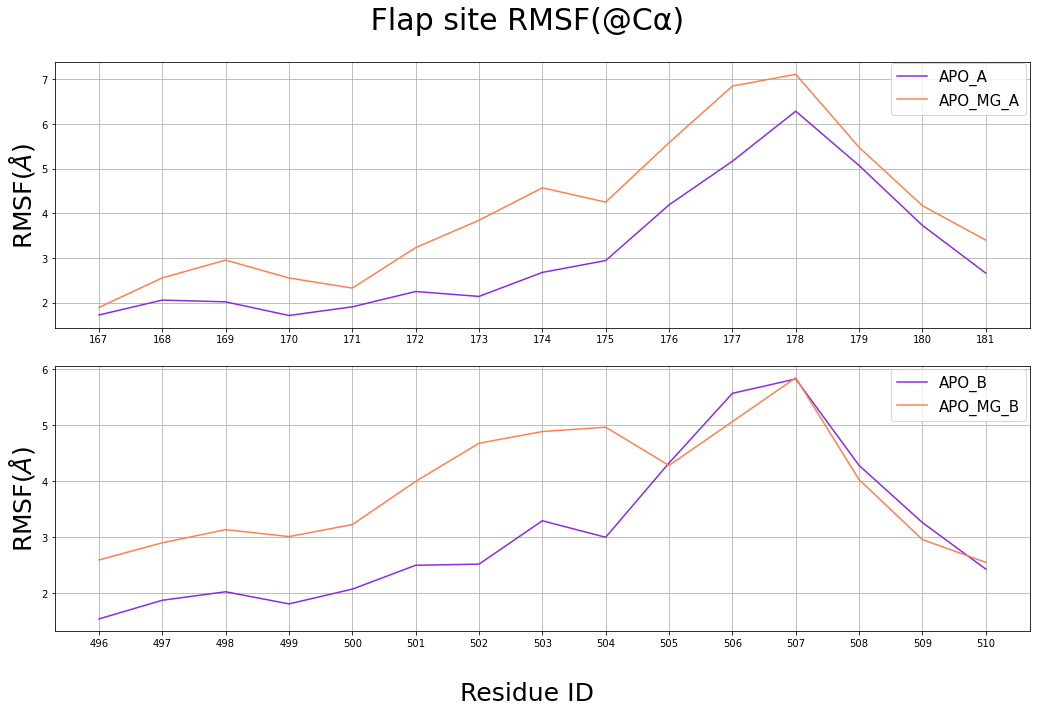

In [119]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
#residues = [177]
xa = range(167,182)
xb = range(496,511)
ax1.plot(xa,SYS1_rmsf[:,1][167:182], label='APO_A', color='blueviolet')
ax1.plot(xa,SYS2_rmsf[:,1][167:182], label='APO_MG_A', color='coral')

ax2.plot(xb,SYS1_rmsf[:,1][496:511], label='APO_B', color='blueviolet')
ax2.plot(xb,SYS2_rmsf[:,1][496:511], label='APO_MG_B', color='coral')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax1.set_xticks(range(167,182))
ax2.set_xticks(range(496,511))
ax1.grid()
ax2.grid()

ax1.set_ylabel('RMSF($\AA$)',fontsize=25)
ax2.set_ylabel('RMSF($\AA$)',fontsize=25)

fig.suptitle(' Flap site RMSF(@Cα) ', fontsize=30)
fig.supxlabel('Residue ID',fontsize=25)

ax1.legend(loc='center left', bbox_to_anchor=(0.85,0.9), fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.85,0.89), fontsize=15)

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

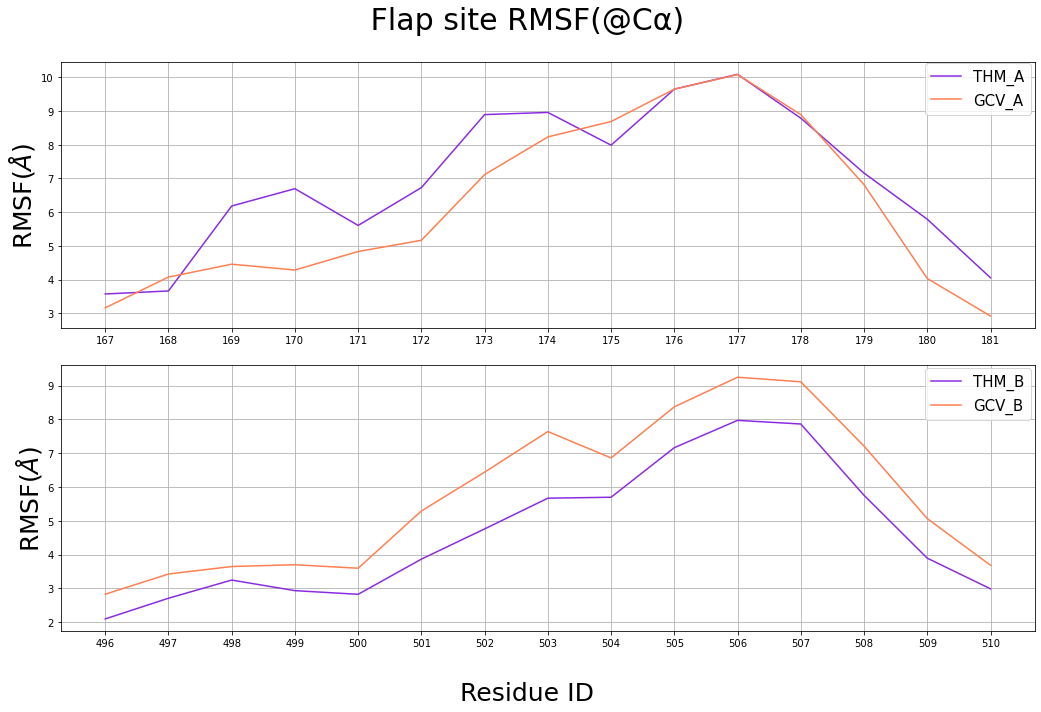

In [125]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
#residues = [177]
xa = range(167,182)
xb = range(496,511)
ax1.plot(xa,SYS3_rmsf[:,1][167:182], label='THM_A', color='blueviolet')
ax1.plot(xa,SYS4_rmsf[:,1][167:182], label='GCV_A', color='coral')

ax2.plot(xb,SYS3_rmsf[:,1][496:511], label='THM_B', color='blueviolet')
ax2.plot(xb,SYS4_rmsf[:,1][496:511], label='GCV_B', color='coral')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax1.set_xticks(range(167,182))
ax2.set_xticks(range(496,511))
ax1.grid()
ax2.grid()

ax1.set_ylabel('RMSF($\AA$)',fontsize=25)
ax2.set_ylabel('RMSF($\AA$)',fontsize=25)

fig.suptitle(' Flap site RMSF(@Cα) ', fontsize=30)
fig.supxlabel('Residue ID',fontsize=25)

ax1.legend(loc='center left', bbox_to_anchor=(0.88,0.9), fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.88,0.89), fontsize=15)

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

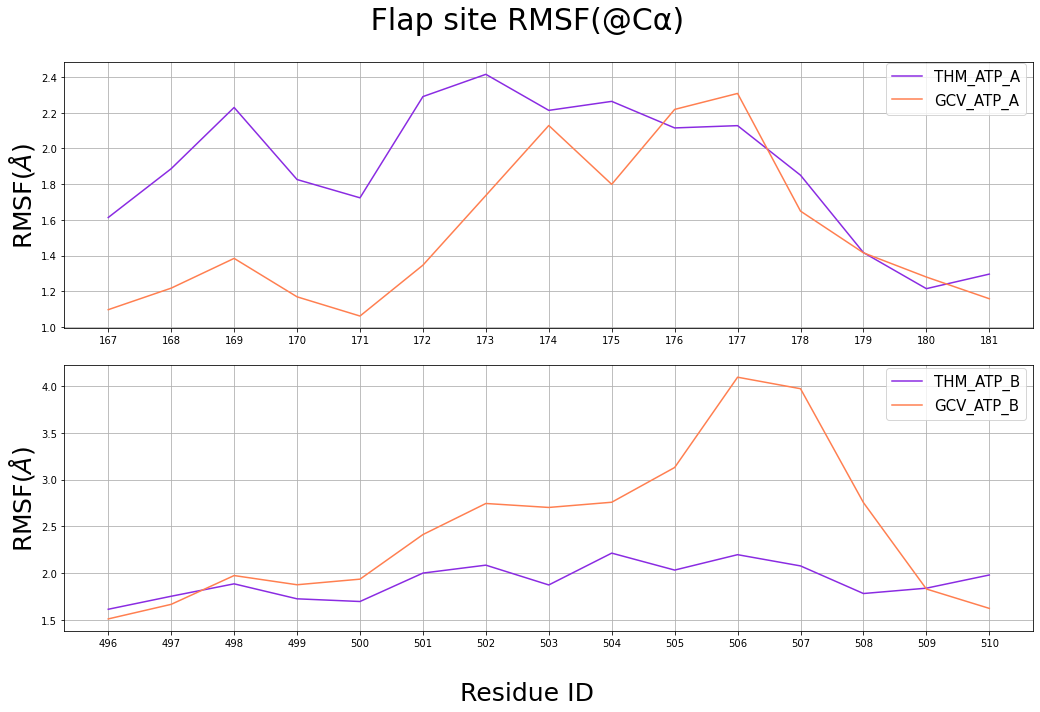

In [131]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
#residues = [177]
xa = range(167,182)
xb = range(496,511)
ax1.plot(xa,SYS5_rmsf[:,1][167:182], label='THM_ATP_A', color='blueviolet')
ax1.plot(xa,SYS6_rmsf[:,1][167:182], label='GCV_ATP_A', color='coral')

ax2.plot(xb,SYS5_rmsf[:,1][496:511], label='THM_ATP_B', color='blueviolet')
ax2.plot(xb,SYS6_rmsf[:,1][496:511], label='GCV_ATP_B', color='coral')


ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax1.set_xticks(range(167,182))
ax2.set_xticks(range(496,511))
ax1.grid()
ax2.grid()

ax1.set_ylabel('RMSF($\AA$)',fontsize=25)
ax2.set_ylabel('RMSF($\AA$)',fontsize=25)

fig.suptitle(' Flap site RMSF(@Cα) ', fontsize=30)
fig.supxlabel('Residue ID',fontsize=25)

ax1.legend(loc='center left', bbox_to_anchor=(0.84,0.9), fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.84,0.89), fontsize=15)

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

# RMSF MOBILE ZONE

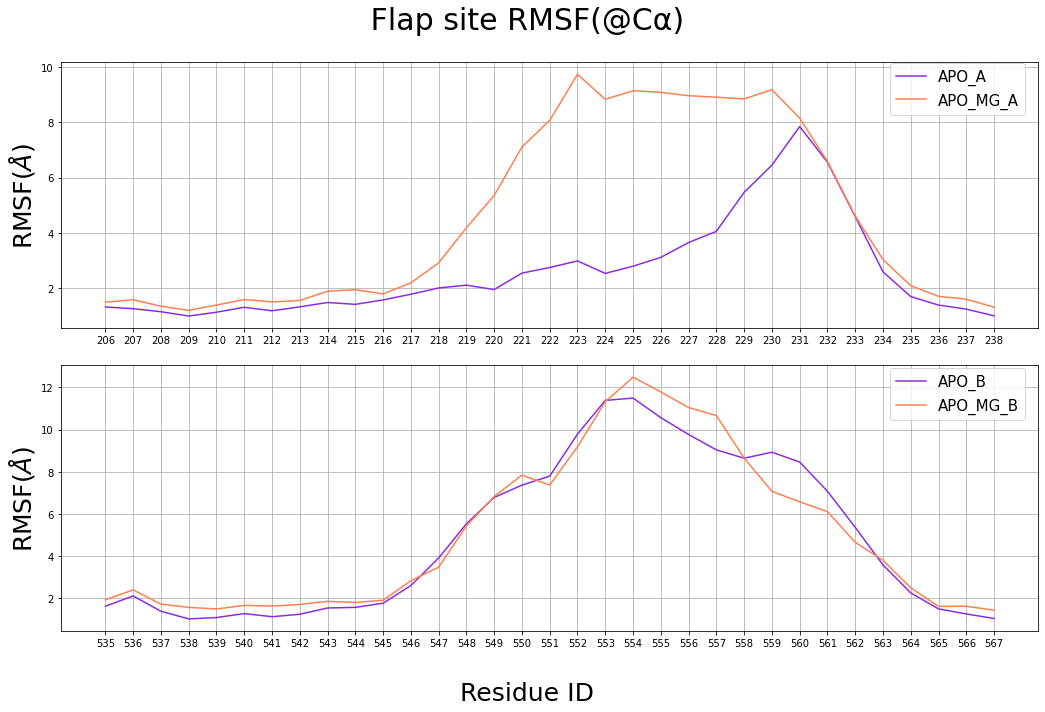

In [135]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
#residues = [177]
xa = range(206,239)
xb = range(535,568)
ax1.plot(xa,SYS1_rmsf[:,1][206:239], label='APO_A', color='blueviolet')
ax1.plot(xa,SYS2_rmsf[:,1][206:239], label='APO_MG_A', color='coral')

ax2.plot(xb,SYS1_rmsf[:,1][535:568], label='APO_B', color='blueviolet')
ax2.plot(xb,SYS2_rmsf[:,1][535:568], label='APO_MG_B', color='coral')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax1.set_xticks(range(206,239))
ax2.set_xticks(range(535,568))
ax1.grid()
ax2.grid()

ax1.set_ylabel('RMSF($\AA$)',fontsize=25)
ax2.set_ylabel('RMSF($\AA$)',fontsize=25)

fig.suptitle(' Mobile zone RMSF(@Cα) ', fontsize=30)
fig.supxlabel('Residue ID',fontsize=25)

ax1.legend(loc='center left', bbox_to_anchor=(0.84,0.9), fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.84,0.89), fontsize=15)

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

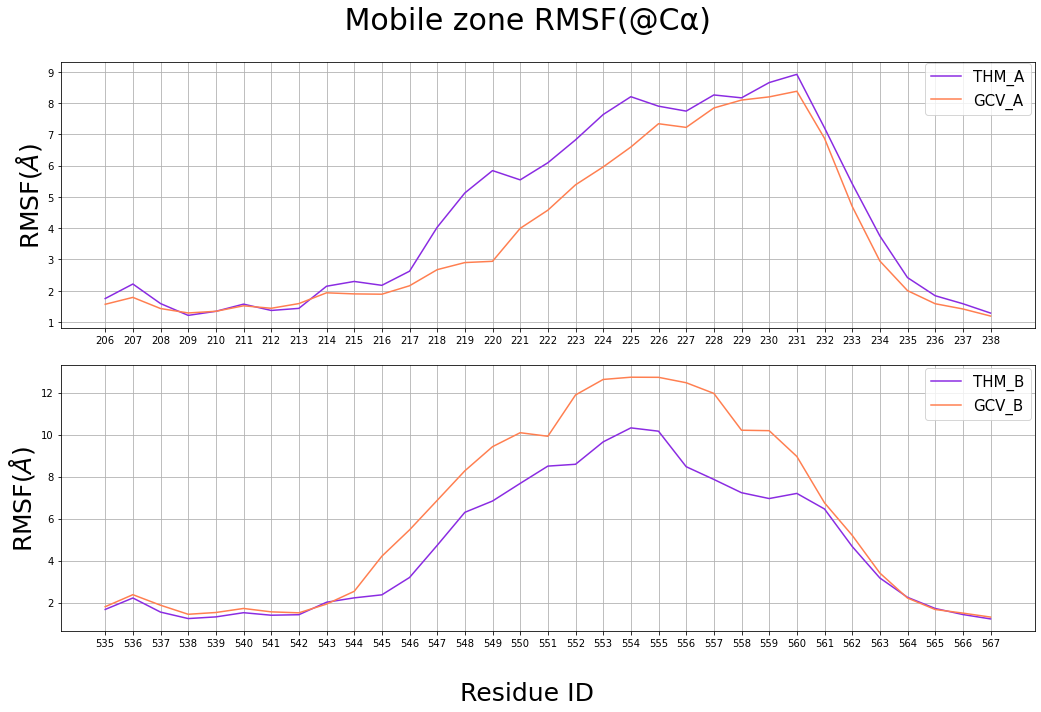

In [139]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
#residues = [177]
xa = range(206,239)
xb = range(535,568)
ax1.plot(xa,SYS3_rmsf[:,1][206:239], label='THM_A', color='blueviolet')
ax1.plot(xa,SYS4_rmsf[:,1][206:239], label='GCV_A', color='coral')

ax2.plot(xb,SYS3_rmsf[:,1][535:568], label='THM_B', color='blueviolet')
ax2.plot(xb,SYS4_rmsf[:,1][535:568], label='GCV_B', color='coral')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax1.set_xticks(range(206,239))
ax2.set_xticks(range(535,568))
ax1.grid()
ax2.grid()

ax1.set_ylabel('RMSF($\AA$)',fontsize=25)
ax2.set_ylabel('RMSF($\AA$)',fontsize=25)

fig.suptitle(' Mobile zone RMSF(@Cα) ', fontsize=30)
fig.supxlabel('Residue ID',fontsize=25)

ax1.legend(loc='center left', bbox_to_anchor=(0.88,0.9), fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.88,0.89), fontsize=15)

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

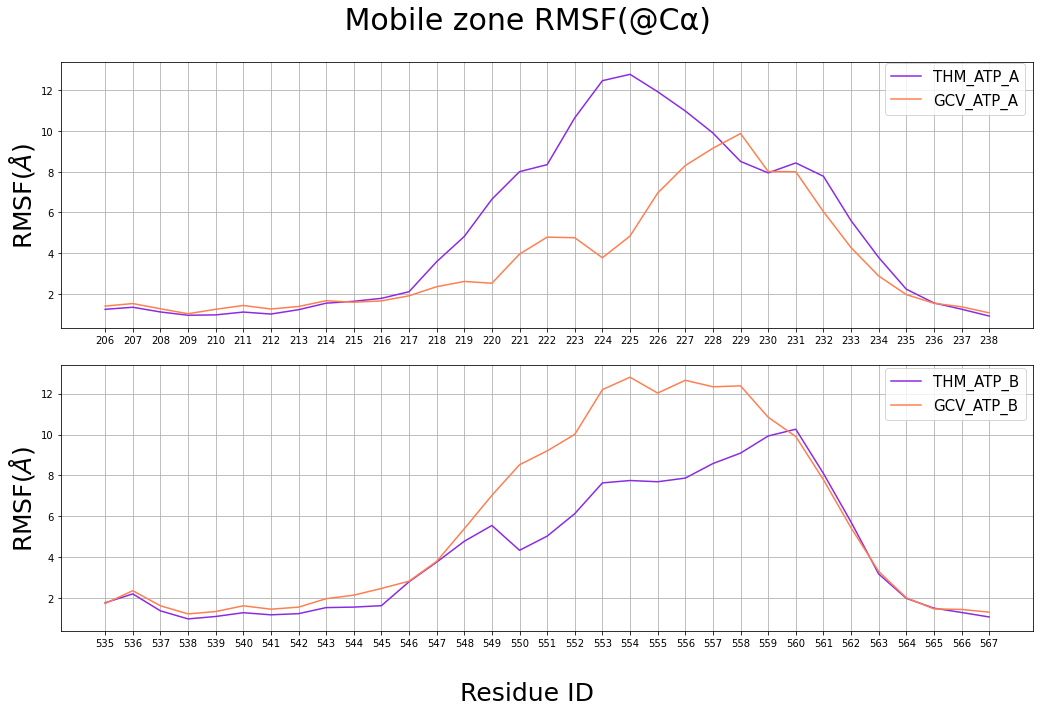

In [137]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
#residues = [177]
xa = range(206,239)
xb = range(535,568)
ax1.plot(xa,SYS5_rmsf[:,1][206:239], label='THM_ATP_A', color='blueviolet')
ax1.plot(xa,SYS6_rmsf[:,1][206:239], label='GCV_ATP_A', color='coral')

ax2.plot(xb,SYS5_rmsf[:,1][535:568], label='THM_ATP_B', color='blueviolet')
ax2.plot(xb,SYS6_rmsf[:,1][535:568], label='GCV_ATP_B', color='coral')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax1.set_xticks(range(206,239))
ax2.set_xticks(range(535,568))
ax1.grid()
ax2.grid()

ax1.set_ylabel('RMSF($\AA$)',fontsize=25)
ax2.set_ylabel('RMSF($\AA$)',fontsize=25)

fig.suptitle(' Mobile zone RMSF(@Cα) ', fontsize=30)
fig.supxlabel('Residue ID',fontsize=25)

ax1.legend(loc='center left', bbox_to_anchor=(0.84,0.9), fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.84,0.89), fontsize=15)

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)